In [1]:
# importing libraries installing packages
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
from keras.models import Sequential
import time 
from keras.callbacks import TensorBoard
import pytesseract
# from keras.layers import Dense

import tensorflow.compat.v2 as tf
from tensorflow import keras
model = keras.models.Sequential()
from keras import layers

model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))



In [147]:
# creating a tensorboard name for the model that is about to be run to vizualize the graph and accuracy
NAME = "OTC-vs-Prescribed-cnn-450-30-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333
                                     )
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

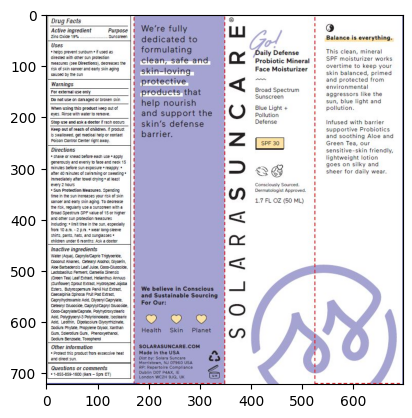

In [148]:

#referring to the directory of the datasets
Directs = r"C:\Users\Lilu\Desktop\IS\drugs"
categories = ["otc", "prescription"]

# vizualization of how our dataset is processed
for category in categories:
    path = os.path.join(Directs, category)
    for img in os.listdir(path):
      img_array = cv.imread(os.path.join(path, img), cv.IMREAD_UNCHANGED) #color may or maynot be needed
      img_array = cv.cvtColor(img_array, cv.COLOR_BGR2RGB)
      plt.imshow(img_array)
      break
    break


3


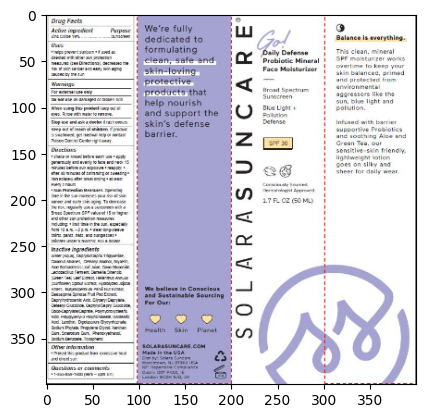

In [163]:
img_size = 400 #resizing may cause problems
#
new_array = cv.resize(img_array, (img_size, img_size))
plt.imshow(new_array)
print(new_array.shape[-1])

In [164]:
training_data = []
# preprocessing the images and appending it as a list of tuple and basically creating a training data
def train_data():
    for category in categories:
        path = os.path.join(Directs, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path, img), cv.IMREAD_COLOR) #color may or maynot be needed
                new_array = cv.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
train_data()



In [45]:
print(len(training_data))
print(new_array.shape[-1])

1425
3


In [165]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    # plt.imshow()
    print(sample[1])

1
1
0
0
1
0
1
1
0
1


In [166]:
X = []
Y = []
for features, label in training_data:
    X.append(features)
    Y.append(label)
# X = np.array(X).reshape(-1, img_size, img_size, 1)
# print(X.shape[-1])

In [167]:
import pickle
# storing the data to and writing in binary mode to a file
pickle_out = open("x.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()


In [95]:
# this part of the code was what I was going to use to compare with the cnn model. This code specifically trains a model by extracting specific text feature and I assume it was going to be accurate than the other model because my dataset contains texts. For some reason this code won't run and I have tried everything.

# from sklearn.feature_extraction.text import CountVectorizer
# import pytesseract
# import pickle
#
# # Define a function to extract text from an image using Tesseract OCR
# def extct_text(img):
#   extracted = pytesseract.image_to_string(img)
#   return extracted
#
# print(img.shape[-1])


# # Load image dataset and reading it in binary mode
# with open("x.pickle", "rb") as f:
#     X = pickle.load(f)
# with open("y.pickle", "rb") as f:
#     Y = pickle.load(f)
#

# # Extracting text from every image and adding features
# X = np.array(X)
# X_text = []
# for img in X:
#     # print(img.shape[-1])
#     # if img.shape[-1] == 3:
#     gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#     _, binary = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# # text extraction using tesseract engine
#     text = extract_text(binary)
#     X_text.append(text)
#

# vector = CountVectorizer()
# X_text = vector.fit_transform(X_text)
#
# # the image feature and the text feature is combined

# from scipy.sparse import hstack, csr_matrix
# X_sparse = csr_matrix(X.reshape(X.shape[0], -1))
# X = hstack((X_sparse, X_text))

# preparation for training

# # Split data into training and validation sets
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=42)

3


KeyboardInterrupt: 

In [ ]:
# the training process reads the stored file in binary
from sklearn.model_selection import train_test_split
pickle_in = open("x.pickle", "rb")
X = pickle.load(pickle_in)
X = pickle.load(open("x.pickle", "rb"))
Y = pickle.load(open("y.pickle", "rb"))
X = np.array(X)/255.0
Y = np.array(Y)
# splitting the data into training and validation, split by 20%
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)

# the four sequential neural network
model = Sequential()

# these are the convolutional neural network layer
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
# activation or pooling layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
# activation or pooling layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=6, validation_data=(X_val, y_val), callbacks=[tensorboard])
# model.fit(X, Y, batch_size = 32, epochs = 4, validation_split = 0.3, callbacks = [tensorboard])

Epoch 1/6


In [14]:
from keras.models import load_model
model = load_model("my_model.h5")

img = cv.imread('./otcc.jpeg')

# Preprocess the image
img = cv.resize(img, (450,450)) # resize the image
# convert to grayscale may or maynot be important
# img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# scale pixel values to be between 0 and 1
img = img/255.0

# Make a prediction
prediction = model.predict(np.array([img]))[0][0]
print(prediction)
# Print the prediction
if prediction > 0.5:
    print("This is an OTC product")
else:
    print("This is a Prescription Product")


1/1 [==============================] - 0s 172ms/step
0.5446507
This is an OTC product


In [48]:
# installing gradio
!pip install gradio


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached pip-23.1.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\Lilu\Junior_IS_tb\venv\Scripts\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import gradio as gr
import cv2 as cv
import numpy as np
from keras.models import load_model

#loading the trained model
model_path = "my_model.h5"
model = load_model(model_path)

# this function takes an image as an input then makes a text output of the prediction
def class_predict(image):
    # try:
    img = cv.resize(image,(450, 450))
    img = img/255.0
    prediction = model.predict(np.array([img]))[0][0]
    if prediction > 0.5:
        return "This is an OTC product"
    else:
        return "This is a Prescription product"

# User interface API calls the function class_predict
image_input = gr.inputs.Image(label="Upload an image")
prediction_output = gr.outputs.Textbox(label="Prediction")
interface = gr.Interface(fn=class_predict, inputs=image_input, outputs=prediction_output, title="Prescription or OTC Product Classifier", debug=True)
interface.launch()

C:\Users\Lilu\Junior_IS_tb\venv\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Lilu\Junior_IS_tb\venv\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\Lilu\Junior_IS_tb\venv\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\Lilu\Junior_IS_tb\venv\lib\site-packages\gradio\deprecation.py:43: UserWarning: You have unused kwarg parameters in Interface, please remove them: {'debug': True}
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
